In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic') #한글 폰트 적용시

In [2]:
import pandas as pd
import geopandas as gpd

c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
# 종분포 데이터
gdf_pt = gpd.read_file('../data/geo_mbris_obis_edu_light.gpkg', encoding="UTF-8")
gdf_pt.info()
gdf_pt.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 220833 entries, 0 to 220832
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   spc_scitf_nm  220833 non-null  object  
 1   comm_kor_nm   163598 non-null  object  
 2   genus         220681 non-null  object  
 3   genus_nm      164667 non-null  object  
 4   family        220727 non-null  object  
 5   family_nm     163772 non-null  object  
 6   order_        220742 non-null  object  
 7   order_nm      162672 non-null  object  
 8   class         220809 non-null  object  
 9   class_nm      171786 non-null  object  
 10  phylum        220811 non-null  object  
 11  phylum_nm     206406 non-null  object  
 12  kingdom       220833 non-null  object  
 13  kingdom_nm    220833 non-null  object  
 14  lati_val      220833 non-null  float64 
 15  loti_val      220833 non-null  float64 
 16  col_bg_dt     220833 non-null  object  
 17  ssea_id       220833 

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
0,Mucor circinelloides,None,Mucor,None,Mucoraceae,None,Mucorales,None,Mucoromycetes,None,...,None,Fungi,균계,38.481861,128.438194,20160802,EM,5055-3,mbris,POINT (128.43819 38.48186)
1,Paralinhomoeus gerlachi,None,Paralinhomoeus,None,Linhomoeidae,None,Monhysterida,None,Chromadorea,None,...,선형동물문,Animalia,동물계,38.269869,128.557564,20160415,EM,55-4,mbris,POINT (128.55756 38.26987)
2,Aplysia kurodai,군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,None,Gastropoda,복족강,...,연체동물문,Animalia,동물계,38.271903,128.558261,20190522,EM,55-4,mbris,POINT (128.55826 38.27190)
3,Botrytis cinerea,None,Botrytis,None,Sclerotiniaceae,None,Helotiales,None,Leotiomycetes,None,...,None,Fungi,균계,38.153361,128.608306,19000100,EM,55-7,mbris,POINT (128.60831 38.15336)
4,Trichoderma,None,Trichoderma,None,Hypocreaceae,None,Hypocreales,None,Sordariomycetes,None,...,None,Fungi,균계,37.858556,128.854389,20160926,EM,62-3,mbris,POINT (128.85439 37.85856)


In [4]:
# 대한민국 육지부 
gdf_kor = gpd.read_file('../data/korea.shp', encoding="UTF-8")
gdf_kor.head()

,FID,geometry
0,0,"POLYGON ((125.09799 34.09642, 125.12315 34.087..."
1,1,"POLYGON ((125.28408 34.40385, 125.29186 34.391..."
2,2,"POLYGON ((125.29369 34.45168, 125.29432 34.439..."
3,3,"POLYGON ((125.85485 34.63038, 125.86109 34.604..."
4,4,"POLYGON ((125.46499 34.65614, 125.47765 34.649..."


In [5]:
# 종분포(포인트)에서  괭생이모자반(Sargassum horneri)을 추출 
gdf_pt2 = gdf_pt[ (gdf_pt['spc_scitf_nm']  == 'Sargassum horneri')  | (gdf_pt['comm_kor_nm']  == '괭생이모자반')   ]
gdf_pt2.info()
gdf_pt2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 780 entries, 294 to 217940
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   spc_scitf_nm  780 non-null    object  
 1   comm_kor_nm   780 non-null    object  
 2   genus         780 non-null    object  
 3   genus_nm      780 non-null    object  
 4   family        780 non-null    object  
 5   family_nm     780 non-null    object  
 6   order_        780 non-null    object  
 7   order_nm      780 non-null    object  
 8   class         780 non-null    object  
 9   class_nm      780 non-null    object  
 10  phylum        780 non-null    object  
 11  phylum_nm     780 non-null    object  
 12  kingdom       780 non-null    object  
 13  kingdom_nm    780 non-null    object  
 14  lati_val      780 non-null    float64 
 15  loti_val      780 non-null    float64 
 16  col_bg_dt     780 non-null    object  
 17  ssea_id       780 non-null    object  
 18  ss

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
294,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.114167,126.114167,20110204,SW,232-7,mbris,POINT (126.11417 33.11417)
295,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.114167,126.114167,20110204,SW,232-7,mbris,POINT (126.11417 33.11417)
636,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.119444,126.265278,20110205,SW,232-8,mbris,POINT (126.26528 33.11944)
643,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.119444,126.265278,20110205,SW,232-8,mbris,POINT (126.26528 33.11944)
644,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.119444,126.265278,20110205,SW,232-8,mbris,POINT (126.26528 33.11944)


In [7]:
# pip install seaborn 설치해 주십시오 
import seaborn as sns

c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: >

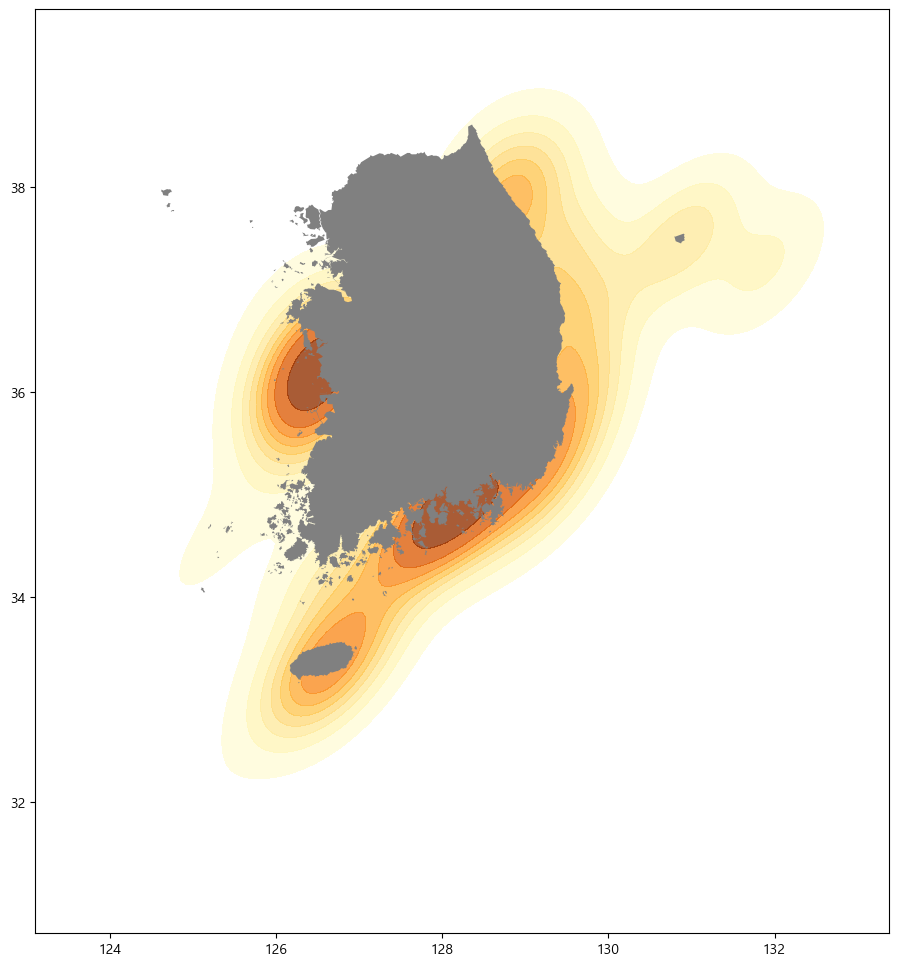

In [8]:
ax = gdf_kor.plot(color='grey', figsize=(12, 12), zorder=100, alpha=1)    # 차트의 순서를 지정 
sns.kdeplot(data=gdf_pt2, x=gdf_pt2.geometry.x, y=gdf_pt2.geometry.y, fill=True, cmap="YlOrBr", alpha=0.8, ax=ax)

<Axes: >

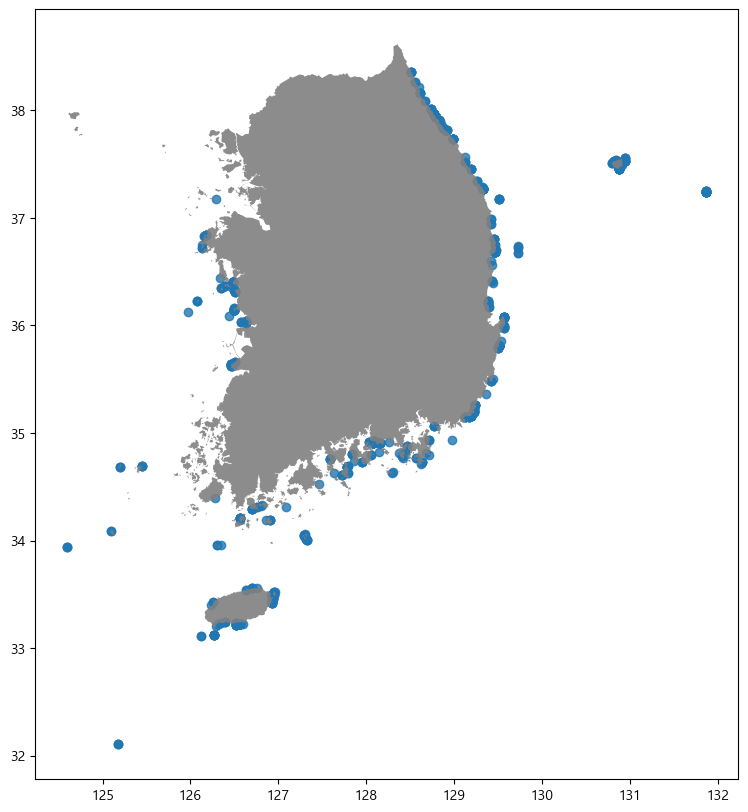

In [9]:
ax = gdf_kor.plot(color='grey', figsize=(10, 10), zorder=100, alpha=0.9)    # 차트의 순서를 지정 
gdf_pt2.plot(alpha=0.8, ax=ax)

In [10]:
gdf_pt2.explore(marker_type='circle_marker', marker_kwds=dict(radius=4, color='red'), tiles='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}&s=Ga', attr='google')